In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [62]:
df1= pd.read_excel("D:/Apsis/OBD Work/Kaggle_data/dailyRoutes.xlsx")

In [63]:
df1.shape

(47514, 33)

In [64]:
df1.head()

TIMESTAMP       MARK  MODEL  CAR_YEAR  ENGINE_POWER AUTOMATIC  \
0  1502902504267  chevrolet  agile    2011.0           1.4         n   
1  1502902512283  chevrolet  agile    2011.0           1.4         n   
2  1502902520291  chevrolet  agile    2011.0           1.4         n   
3  1502902528300  chevrolet  agile    2011.0           1.4         n   
4  1502902536320  chevrolet  agile    2011.0           1.4         n   

  VEHICLE_ID  BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  FUEL_LEVEL  ...  \
0       car1                     100.0                 80.0       0.486  ...   
1       car1                     100.0                 80.0       0.486  ...   
2       car1                     100.0                 80.0       0.486  ...   
3       car1                     100.0                 80.0       0.486  ...   
4       car1                     100.0                 80.0       0.486  ...   

   THROTTLE_POS         DTC_NUMBER  TROUBLE_CODES  TIMING_ADVANCE  \
0         0.251  MIL is OFF0 codes            NaN           0.569   
1         0.251  MIL is OFF0 codes            NaN           0.565   
2         0.251  MIL is OFF0 codes            NaN           0.573   
3         0.251  MIL is OFF0 codes            NaN           0.565   
4         0.251  MIL is OFF0 codes            NaN           0.569   

   EQUIV_RATIO   MIN HOURS  DAYS_OF_WEEK  MONTHS    YEAR  
0         0.01  13.0  16.0           2.0     8.0  2017.0  
1         0.01  13.0  16.0           2.0     8.0  2017.0  
2         0.01  13.0  16.0           2.0     8.0  2017.0  
3         0.01  13.0  16.0           2.0     8.0  2017.0  
4         0.01  13.0  16.0           2.0     8.0  2017.0  

[5 rows x 33 columns]

In [65]:
df1.isnull().sum()

TIMESTAMP                          0
MARK                              55
MODEL                             55
CAR_YEAR                          55
ENGINE_POWER                      55
AUTOMATIC                         55
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       37302
ENGINE_COOLANT_TEMP            13550
FUEL_LEVEL                     44520
ENGINE_LOAD                    16542
AMBIENT_AIR_TEMP               43895
ENGINE_RPM                     13655
INTAKE_MANIFOLD_PRESSURE       22425
MAF                            35686
LONG TERM FUEL TRIM BANK 2     34444
FUEL_TYPE                      27509
AIR_INTAKE_TEMP                13162
FUEL_PRESSURE                  47376
SPEED                            985
SHORT TERM FUEL TRIM BANK 2    34444
SHORT TERM FUEL TRIM BANK 1     9919
ENGINE_RUNTIME                 35612
THROTTLE_POS                   13655
DTC_NUMBER                       372
TROUBLE_CODES                  35589
TIMING_ADVANCE                 13352
E

In [66]:
df1.drop(df1.columns.difference(['ENGINE_POWER','BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','FUEL_PRESSURE','FUEL_TYPE', 'ENGINE_LOAD','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF','SPEED','THROTTLE_POS','LONG TERM FUEL TRIM BANK 2']), 1, inplace=True)

In [67]:
df1.head()

ENGINE_POWER  BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  FUEL_LEVEL  \
0           1.4                     100.0                 80.0       0.486   
1           1.4                     100.0                 80.0       0.486   
2           1.4                     100.0                 80.0       0.486   
3           1.4                     100.0                 80.0       0.486   
4           1.4                     100.0                 80.0       0.486   

   ENGINE_LOAD  ENGINE_RPM  INTAKE_MANIFOLD_PRESSURE   MAF  \
0        0.333      1009.0                      49.0  4.49   
1        0.325      1003.0                      52.0  4.51   
2        0.329       995.0                      51.0  4.48   
3        0.325      1004.0                      51.0  4.51   
4        0.329      1005.0                      49.0  4.49   

   LONG TERM FUEL TRIM BANK 2          FUEL_TYPE  FUEL_PRESSURE  SPEED  \
0                         NaN  Biodiesel_Ethanol            NaN    0.0   
1                         NaN  Biodiesel_Ethanol            NaN    0.0   
2                         NaN  Biodiesel_Ethanol            NaN    0.0   
3                         NaN  Biodiesel_Ethanol            NaN    0.0   
4                         NaN  Biodiesel_Ethanol            NaN    0.0   

   THROTTLE_POS  
0         0.251  
1         0.251  
2         0.251  
3         0.251  
4         0.251

In [68]:
df1.columns

Index(['ENGINE_POWER', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE',
       'MAF', 'LONG TERM FUEL TRIM BANK 2', 'FUEL_TYPE', 'FUEL_PRESSURE',
       'SPEED', 'THROTTLE_POS'],
      dtype='object')

In [69]:
df1.isnull().sum()

ENGINE_POWER                     55
BAROMETRIC_PRESSURE(KPA)      37302
ENGINE_COOLANT_TEMP           13550
FUEL_LEVEL                    44520
ENGINE_LOAD                   16542
ENGINE_RPM                    13655
INTAKE_MANIFOLD_PRESSURE      22425
MAF                           35686
LONG TERM FUEL TRIM BANK 2    34444
FUEL_TYPE                     27509
FUEL_PRESSURE                 47376
SPEED                           985
THROTTLE_POS                  13655
dtype: int64

In [70]:
# function for the percentage of the null values
def assess_NA(data):
  
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [71]:
assess_NA(df1)

Number of NA  Percent NA
FUEL_PRESSURE                      47376       99.71
FUEL_LEVEL                         44520       93.70
BAROMETRIC_PRESSURE(KPA)           37302       78.51
MAF                                35686       75.11
LONG TERM FUEL TRIM BANK 2         34444       72.49
FUEL_TYPE                          27509       57.90
INTAKE_MANIFOLD_PRESSURE           22425       47.20
ENGINE_LOAD                        16542       34.82
THROTTLE_POS                       13655       28.74
ENGINE_RPM                         13655       28.74
ENGINE_COOLANT_TEMP                13550       28.52
SPEED                                985        2.07
ENGINE_POWER                          55        0.12

In [72]:
df1.FUEL_TYPE.value_counts()

Biodiesel_Ethanol     19867
Biodiesel_Gasoline      138
Name: FUEL_TYPE, dtype: int64

In [73]:
df1.dtypes

ENGINE_POWER                  float64
BAROMETRIC_PRESSURE(KPA)      float64
ENGINE_COOLANT_TEMP           float64
FUEL_LEVEL                    float64
ENGINE_LOAD                   float64
ENGINE_RPM                    float64
INTAKE_MANIFOLD_PRESSURE      float64
MAF                           float64
LONG TERM FUEL TRIM BANK 2    float64
FUEL_TYPE                      object
FUEL_PRESSURE                 float64
SPEED                         float64
THROTTLE_POS                  float64
dtype: object

In [74]:
df1.drop(['FUEL_LEVEL','INTAKE_MANIFOLD_PRESSURE','MAF','FUEL_TYPE','LONG TERM FUEL TRIM BANK 2','FUEL_PRESSURE','BAROMETRIC_PRESSURE(KPA)'], axis=1, inplace=True)

In [75]:
df1.shape

(47514, 6)

In [76]:
df1.head()

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
0           1.4                 80.0        0.333      1009.0    0.0   
1           1.4                 80.0        0.325      1003.0    0.0   
2           1.4                 80.0        0.329       995.0    0.0   
3           1.4                 80.0        0.325      1004.0    0.0   
4           1.4                 80.0        0.329      1005.0    0.0   

   THROTTLE_POS  
0         0.251  
1         0.251  
2         0.251  
3         0.251  
4         0.251

In [77]:
df1.shape

(47514, 6)

In [78]:
df1.isnull().sum()

ENGINE_POWER              55
ENGINE_COOLANT_TEMP    13550
ENGINE_LOAD            16542
ENGINE_RPM             13655
SPEED                    985
THROTTLE_POS           13655
dtype: int64

In [79]:
#threshold to drop which has 6 null values
df2=df1.dropna(thresh=6)

In [80]:
df2.shape

(29157, 6)

In [81]:
df2.isnull().sum()

ENGINE_POWER           0
ENGINE_COOLANT_TEMP    0
ENGINE_LOAD            0
ENGINE_RPM             0
SPEED                  0
THROTTLE_POS           0
dtype: int64

In [82]:
df2.head()

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
0           1.4                 80.0        0.333      1009.0    0.0   
1           1.4                 80.0        0.325      1003.0    0.0   
2           1.4                 80.0        0.329       995.0    0.0   
3           1.4                 80.0        0.325      1004.0    0.0   
4           1.4                 80.0        0.329      1005.0    0.0   

   THROTTLE_POS  
0         0.251  
1         0.251  
2         0.251  
3         0.251  
4         0.251

In [83]:
#df1.reset_index(drop=True, inplace=True)

In [84]:
df2.dtypes

ENGINE_POWER           float64
ENGINE_COOLANT_TEMP    float64
ENGINE_LOAD            float64
ENGINE_RPM             float64
SPEED                  float64
THROTTLE_POS           float64
dtype: object

In [85]:
from sklearn.preprocessing import StandardScaler


In [86]:
df2.columns

Index(['ENGINE_POWER', 'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM',
       'SPEED', 'THROTTLE_POS'],
      dtype='object')

In [87]:
#features = ['ENGINE_POWER', 'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM',
     #  'SPEED', 'THROTTLE_POS']
#autoscaler = StandardScaler()
#df2[features] = autoscaler.fit_transform(df2[features])

In [88]:
df2.head()

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
0           1.4                 80.0        0.333      1009.0    0.0   
1           1.4                 80.0        0.325      1003.0    0.0   
2           1.4                 80.0        0.329       995.0    0.0   
3           1.4                 80.0        0.325      1004.0    0.0   
4           1.4                 80.0        0.329      1005.0    0.0   

   THROTTLE_POS  
0         0.251  
1         0.251  
2         0.251  
3         0.251  
4         0.251

In [89]:
df2.tail()

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
47497           1.6                 99.0        0.059      1029.0   50.0   
47499           1.6                 94.0        0.412      2054.0   32.0   
47504           1.6                 94.0        0.196      1185.0   38.0   
47505           1.6                 96.0        0.251      1325.0   45.0   
47512           1.6                 99.0        0.055       769.0    0.0   

       THROTTLE_POS  
47497         0.047  
47499         0.063  
47504         0.173  
47505         0.149  
47512         0.082

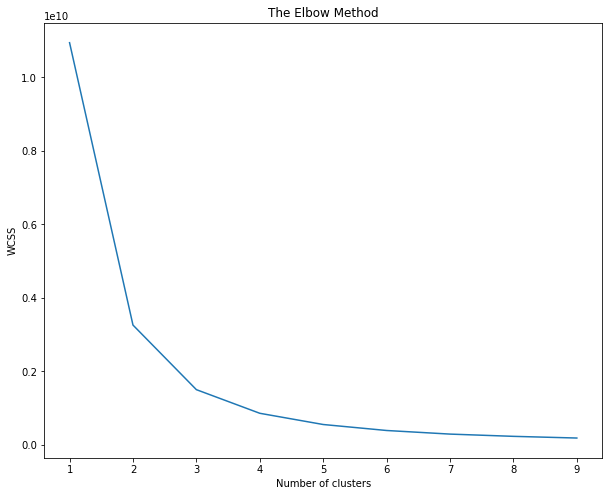

In [90]:
#optimum number of clusters using elbow curve
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df2)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)

kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [92]:
identified_clusters = kmeans.fit_predict(df2)
identified_clusters

array([2, 2, 2, ..., 4, 4, 2])

In [93]:
#to know value counts in array
import numpy as np


unique, counts = np.unique(identified_clusters, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 7303]
 [   1 5284]
 [   2 8400]
 [   3 2089]
 [   4 6081]]


In [94]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import davies_bouldin_score

In [95]:
labels = kmeans.labels_
davies_bouldin_score(df2, labels)

0.514832525818076

In [96]:
df2['Cluster'] = identified_clusters
df2['Cluster']

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        2
1        2
2        2
3        2
4        2
        ..
47497    2
47499    1
47504    4
47505    4
47512    2
Name: Cluster, Length: 29157, dtype: int32

In [97]:
df2.head()

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
0           1.4                 80.0        0.333      1009.0    0.0   
1           1.4                 80.0        0.325      1003.0    0.0   
2           1.4                 80.0        0.329       995.0    0.0   
3           1.4                 80.0        0.325      1004.0    0.0   
4           1.4                 80.0        0.329      1005.0    0.0   

   THROTTLE_POS  Cluster  
0         0.251        2  
1         0.251        2  
2         0.251        2  
3         0.251        2  
4         0.251        2

In [98]:
df2.tail()

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
47497           1.6                 99.0        0.059      1029.0   50.0   
47499           1.6                 94.0        0.412      2054.0   32.0   
47504           1.6                 94.0        0.196      1185.0   38.0   
47505           1.6                 96.0        0.251      1325.0   45.0   
47512           1.6                 99.0        0.055       769.0    0.0   

       THROTTLE_POS  Cluster  
47497         0.047        2  
47499         0.063        1  
47504         0.173        4  
47505         0.149        4  
47512         0.082        2

In [99]:
df2.Cluster.value_counts()

2    8400
0    7303
4    6081
1    5284
3    2089
Name: Cluster, dtype: int64

In [100]:
import pandas_profiling

pandas_profiling.ProfileReport(df2) 

In [101]:
df2.insert(7, "Relative_RPM", 0.0)
rpm_max= df2['ENGINE_RPM'].max()

for i in df2.index:
    df2['Relative_RPM'][i]= df2['ENGINE_RPM'][i]/rpm_max

In [102]:
df2.insert(8, "Relative_Speed",0.0)
speed_max= df2['SPEED'].max()
for i in df2.index:
    df2['Relative_Speed'][i]= df2['SPEED'][i]/speed_max

In [103]:
df2.head(10)

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
0           1.4                 80.0        0.333      1009.0    0.0   
1           1.4                 80.0        0.325      1003.0    0.0   
2           1.4                 80.0        0.329       995.0    0.0   
3           1.4                 80.0        0.325      1004.0    0.0   
4           1.4                 80.0        0.329      1005.0    0.0   
5           1.4                 81.0        0.329      1019.0    0.0   
6           1.4                 81.0        0.333      1002.0    0.0   
7           1.4                 81.0        0.333      1001.0    0.0   
8           1.4                 81.0        0.333      1004.0    0.0   
9           1.4                 81.0        0.329      1010.0    0.0   

   THROTTLE_POS  Cluster  Relative_RPM  Relative_Speed  
0         0.251        2      0.264413             0.0  
1         0.251        2      0.262841             0.0  
2         0.251        2      0.260744             0.0  
3         0.251        2      0.263103             0.0  
4         0.251        2      0.263365             0.0  
5         0.251        2      0.267034             0.0  
6         0.251        2      0.262579             0.0  
7         0.251        2      0.262317             0.0  
8         0.251        2      0.263103             0.0  
9         0.251        2      0.264675             0.0

In [104]:
df2.insert(9, "Rev. Speed/Rev. RPM",0.0)

In [105]:
for i in df2.index:
    df2['Rev. Speed/Rev. RPM'][i]= df2['Relative_Speed'][i]/df2['Relative_RPM'][i]

In [106]:
df2.insert(10, "Rev_RPM/Throttle_Pos.",0.0)

In [107]:
for i in df2.index:
    df2['Rev_RPM/Throttle_Pos.'][i]= df2['Relative_RPM'][i]/df2['THROTTLE_POS'][i]

In [108]:
df2.head(10)

ENGINE_POWER  ENGINE_COOLANT_TEMP  ENGINE_LOAD  ENGINE_RPM  SPEED  \
0           1.4                 80.0        0.333      1009.0    0.0   
1           1.4                 80.0        0.325      1003.0    0.0   
2           1.4                 80.0        0.329       995.0    0.0   
3           1.4                 80.0        0.325      1004.0    0.0   
4           1.4                 80.0        0.329      1005.0    0.0   
5           1.4                 81.0        0.329      1019.0    0.0   
6           1.4                 81.0        0.333      1002.0    0.0   
7           1.4                 81.0        0.333      1001.0    0.0   
8           1.4                 81.0        0.333      1004.0    0.0   
9           1.4                 81.0        0.329      1010.0    0.0   

   THROTTLE_POS  Cluster  Relative_RPM  Relative_Speed  Rev. Speed/Rev. RPM  \
0         0.251        2      0.264413             0.0                  0.0   
1         0.251        2      0.262841             0.0                  0.0   
2         0.251        2      0.260744             0.0                  0.0   
3         0.251        2      0.263103             0.0                  0.0   
4         0.251        2      0.263365             0.0                  0.0   
5         0.251        2      0.267034             0.0                  0.0   
6         0.251        2      0.262579             0.0                  0.0   
7         0.251        2      0.262317             0.0                  0.0   
8         0.251        2      0.263103             0.0                  0.0   
9         0.251        2      0.264675             0.0                  0.0   

   Rev_RPM/Throttle_Pos.  
0               1.053438  
1               1.047174  
2               1.038822  
3               1.048218  
4               1.049262  
5               1.063879  
6               1.046130  
7               1.045086  
8               1.048218  
9               1.054482

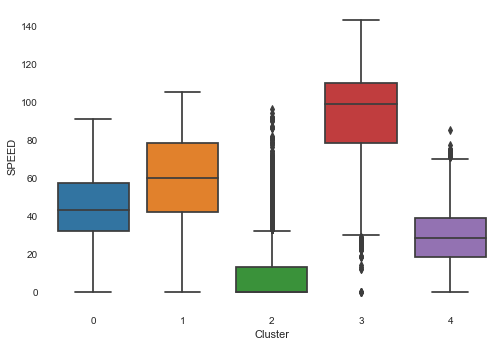

In [109]:
import seaborn as sns

sns.boxplot(x='Cluster', y='SPEED', data=df2)

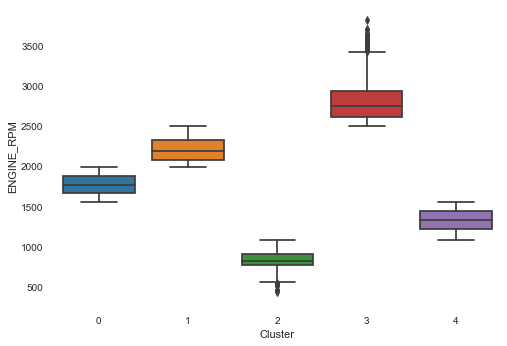

In [110]:
sns.boxplot(x='Cluster', y='ENGINE_RPM', data=df2)

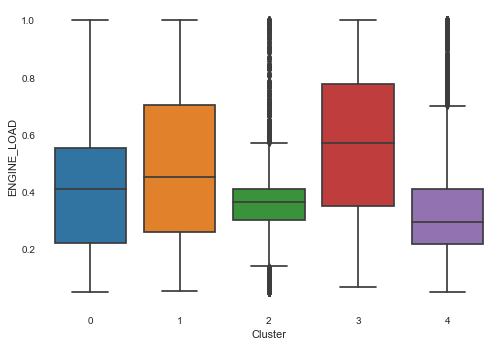

In [111]:
sns.boxplot(x='Cluster', y='ENGINE_LOAD', data=df2)

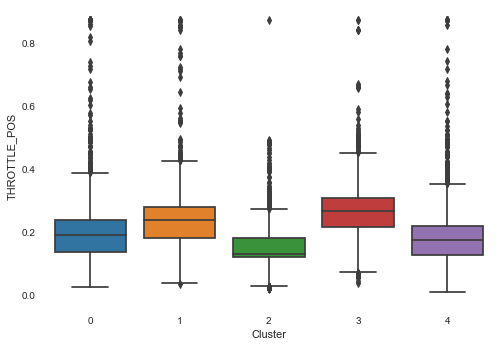

In [112]:
sns.boxplot(x='Cluster', y='THROTTLE_POS', data=df2)

[(0, 2)]

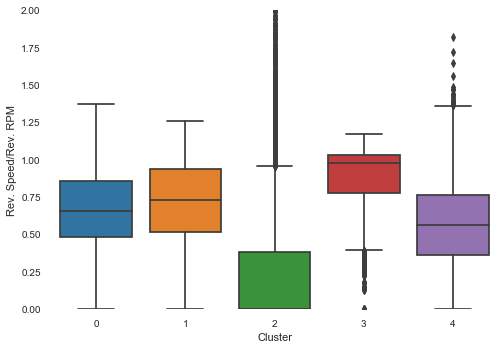

In [113]:
ax = sns.boxplot(x='Cluster', y='Rev. Speed/Rev. RPM', data=df2)
ax.set(ylim=(0,2))

[(0, 6)]

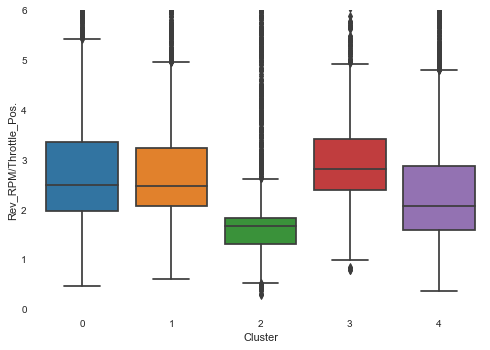

In [114]:
ax =sns.boxplot(x='Cluster', y='Rev_RPM/Throttle_Pos.', data=df2)
ax.set(ylim=(0,6))

In [115]:
df_filtered_0 = df2[df2['Cluster'] == 0]
df_filtered_1 = df2[df2['Cluster'] == 1]
df_filtered_2 = df2[df2['Cluster'] == 2]
df_filtered_3 = df2[df2['Cluster'] == 3]
df_filtered_4 = df2[df2['Cluster'] == 4]

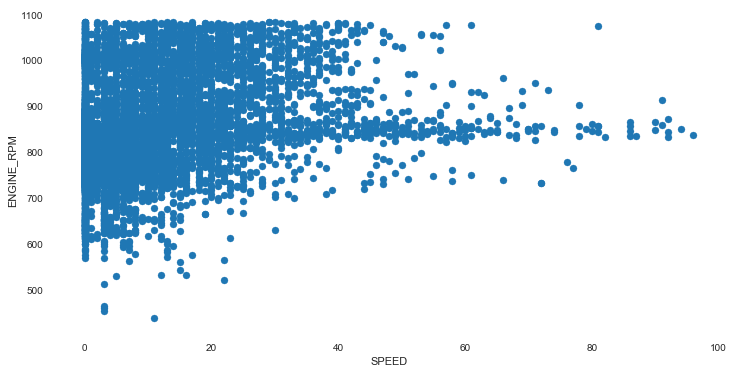

In [116]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_2['SPEED'], df_filtered_2['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

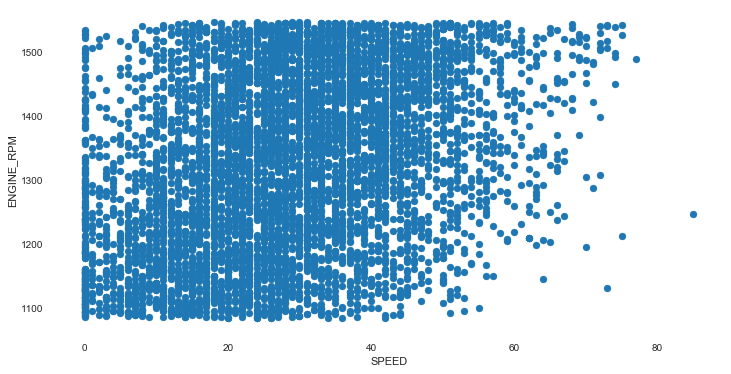

In [117]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_4['SPEED'], df_filtered_4['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

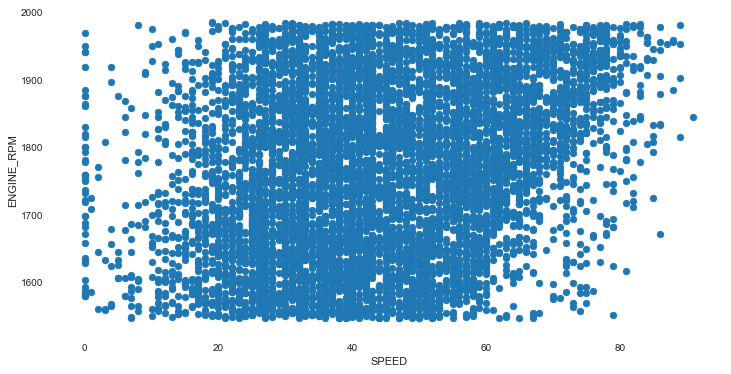

In [118]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_0['SPEED'], df_filtered_0['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

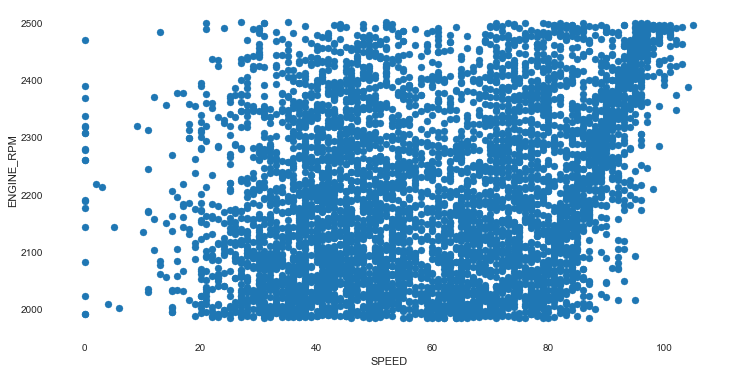

In [119]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_1['SPEED'], df_filtered_1['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

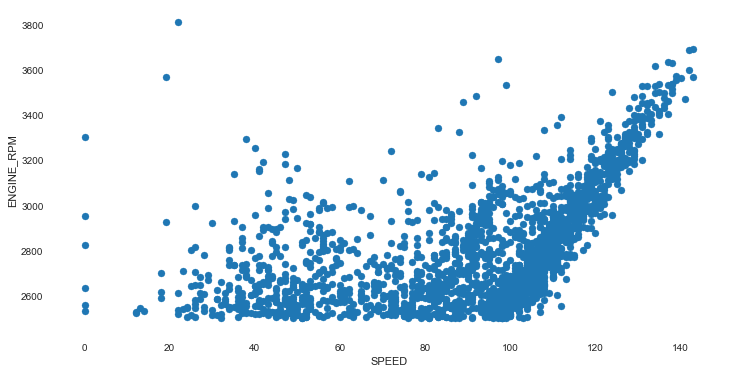

In [120]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_filtered_3['SPEED'], df_filtered_3['ENGINE_RPM'])
ax.set_xlabel('SPEED')
ax.set_ylabel('ENGINE_RPM')
plt.show()

In [121]:
#Cluster3: Aggressive, Rash and very Fuel inefficient/Poor Driving
#Cluster2: UnderConfident and Fuel Inefficient Driving


In [139]:
df2.drop(['Relative_RPM','Relative_Speed','Rev. Speed/Rev. RPM','Rev_RPM/Throttle_Pos.'], axis=1, inplace=True)

In [140]:
X = df2.copy().drop(["Cluster"],axis=1)#drop the alpha ticker and date
Y = df2["Cluster"]

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4)

In [142]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20409, 6)
(20409,)
(8748, 6)
(8748,)


In [143]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

model =  MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [144]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [145]:
sklearn_mlp_train_preds = model.predict(x_train)
sklearn_mlp_validation_preds = model.predict(x_test)

In [146]:
print(classification_report(y_train,sklearn_mlp_train_preds))
print(classification_report(y_test,sklearn_mlp_validation_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5169
           1       0.90      0.92      0.91      3664
           2       0.99      0.98      0.99      5859
           3       0.94      0.91      0.92      1446
           4       0.94      0.94      0.94      4271

    accuracy                           0.94     20409
   macro avg       0.94      0.94      0.94     20409
weighted avg       0.94      0.94      0.94     20409

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2134
           1       0.89      0.92      0.91      1620
           2       0.99      0.99      0.99      2541
           3       0.95      0.90      0.92       643
           4       0.94      0.96      0.95      1810

    accuracy                           0.94      8748
   macro avg       0.94      0.93      0.94      8748
weighted avg       0.94      0.94      0.94      8748



([0.6705882352941176,
  0.6868414604263661,
  0.6865403462920614,
  0.6778145289721916,
  0.6029988239905919,
  0.8274397713352388,
  0.8480330393392133,
  0.7621118392846206,
  0.9097343205574913,
  0.9435543142731148],
 [0.6680384087791496,
  0.6803840877914952,
  0.6848422496570644,
  0.6860996799268404,
  0.6152263374485597,
  0.8332190214906264,
  0.8526520347508002,
  0.7674897119341564,
  0.9070644718792867,
  0.9429583904892547])

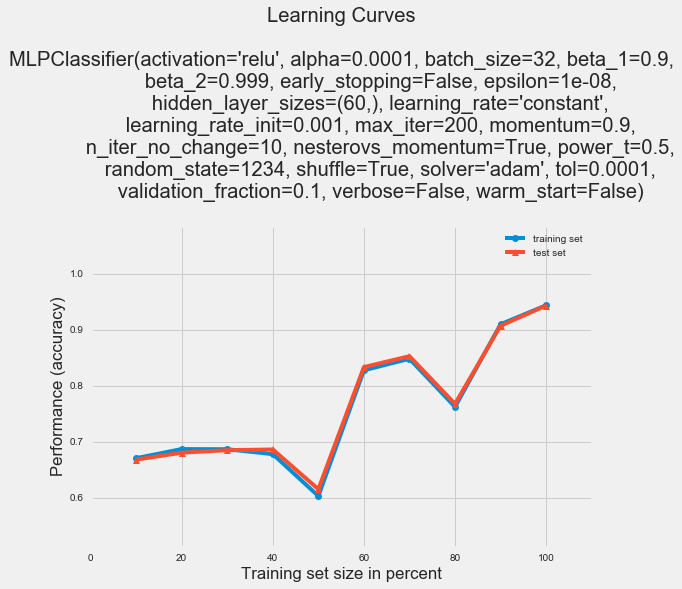

In [147]:
plot_learning_curves(x_train,y_train,x_test,y_test,model,scoring='accuracy')

In [148]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

model =  MLPClassifier(activation='relu', alpha=0.0001, batch_size=16, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [149]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=16, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [150]:
sklearn_mlp_train_preds = model.predict(x_train)
sklearn_mlp_validation_preds = model.predict(x_test)

In [151]:
print(classification_report(y_train,sklearn_mlp_train_preds))
print(classification_report(y_test,sklearn_mlp_validation_preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5169
           1       0.90      0.88      0.89      3664
           2       0.99      0.98      0.99      5859
           3       0.80      1.00      0.88      1446
           4       0.96      0.85      0.90      4271

    accuracy                           0.92     20409
   macro avg       0.91      0.93      0.91     20409
weighted avg       0.93      0.92      0.92     20409

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2134
           1       0.88      0.87      0.88      1620
           2       0.99      0.98      0.99      2541
           3       0.79      0.99      0.88       643
           4       0.96      0.87      0.91      1810

    accuracy                           0.92      8748
   macro avg       0.90      0.92      0.91      8748
weighted avg       0.92      0.92      0.92      8748



([0.6754901960784314,
  0.6415094339622641,
  0.7280300555374061,
  0.6721793458287394,
  0.9236573892591141,
  0.9112290730910576,
  0.9202015959680806,
  0.8912231273350891,
  0.9309668989547039,
  0.923220147973933],
 [0.6744398719707362,
  0.6408321902149062,
  0.7417695473251029,
  0.6798125285779607,
  0.9236396890717878,
  0.9131229995427527,
  0.9154092363968908,
  0.8907178783721994,
  0.9316415180612712,
  0.9207818930041153])

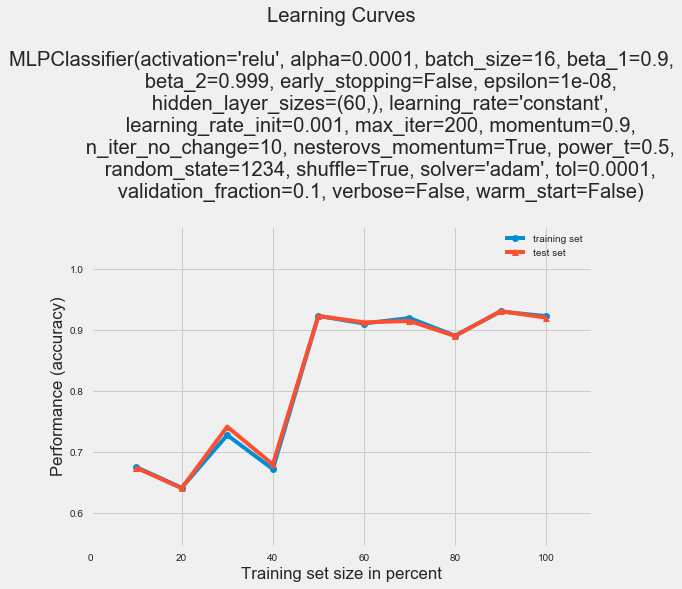

In [152]:
plot_learning_curves(x_train,y_train,x_test,y_test,model,scoring='accuracy')

In [154]:
X.shape

(29157, 6)

In [155]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers, optimizers

adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

classifier=Sequential()

earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'softmax',kernel_regularizer=regularizers.l2()))

#Compiling the ANN
classifier.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size = 10, nb_epoch = 200)

Train on 20409 samples, validate on 8748 samples
Epoch 1/200
20409/20409 [==============================] - 3s 129us/step - loss: 0.5884 - accuracy: 0.7731 - val_loss: 0.3764 - val_accuracy: 0.8652
Epoch 2/200
20409/20409 [==============================] - 2s 101us/step - loss: 0.3584 - accuracy: 0.8761 - val_loss: 0.2856 - val_accuracy: 0.9260
Epoch 3/200
20409/20409 [==============================] - 2s 104us/step - loss: 0.2938 - accuracy: 0.9025 - val_loss: 0.3369 - val_accuracy: 0.8661
Epoch 4/200
20409/20409 [==============================] - 2s 109us/step - loss: 0.2508 - accuracy: 0.9238 - val_loss: 0.2530 - val_accuracy: 0.9036
Epoch 5/200
20409/20409 [==============================] - 2s 102us/step - loss: 0.2223 - accuracy: 0.9379 - val_loss: 0.1888 - val_accuracy: 0.9606
Epoch 6/200
20409/20409 [==============================] - 2s 105us/step - loss: 0.2104 - accuracy: 0.9393 - val_loss: 0.2088 - val_accuracy: 0.9410
Epoch 7/200
20409/20409 [==============================] 

20409/20409 [==============================] - 2s 117us/step - loss: 0.1122 - accuracy: 0.9791 - val_loss: 0.1138 - val_accuracy: 0.9774
Epoch 56/200
20409/20409 [==============================] - 2s 112us/step - loss: 0.1130 - accuracy: 0.9779 - val_loss: 0.1154 - val_accuracy: 0.9735
Epoch 57/200
20409/20409 [==============================] - 2s 112us/step - loss: 0.1115 - accuracy: 0.9784 - val_loss: 0.1091 - val_accuracy: 0.9862
Epoch 58/200
20409/20409 [==============================] - 2s 111us/step - loss: 0.1116 - accuracy: 0.9796 - val_loss: 0.1092 - val_accuracy: 0.9853
Epoch 59/200
20409/20409 [==============================] - 2s 116us/step - loss: 0.1117 - accuracy: 0.9797 - val_loss: 0.1239 - val_accuracy: 0.9656
Epoch 60/200
20409/20409 [==============================] - 2s 110us/step - loss: 0.1120 - accuracy: 0.9770 - val_loss: 0.1165 - val_accuracy: 0.9718
Epoch 61/200
20409/20409 [==============================] - 2s 117us/step - loss: 0.1102 - accuracy: 0.9811 - val

20409/20409 [==============================] - 2s 108us/step - loss: 0.1006 - accuracy: 0.9844 - val_loss: 0.1005 - val_accuracy: 0.9864
Epoch 110/200
20409/20409 [==============================] - 2s 109us/step - loss: 0.1008 - accuracy: 0.9827 - val_loss: 0.1010 - val_accuracy: 0.9859
Epoch 111/200
20409/20409 [==============================] - 2s 111us/step - loss: 0.1015 - accuracy: 0.9826 - val_loss: 0.1009 - val_accuracy: 0.9851
Epoch 112/200
20409/20409 [==============================] - 2s 118us/step - loss: 0.1004 - accuracy: 0.9843 - val_loss: 0.1007 - val_accuracy: 0.9839
Epoch 113/200
20409/20409 [==============================] - 2s 119us/step - loss: 0.1008 - accuracy: 0.9827 - val_loss: 0.1011 - val_accuracy: 0.9834
Epoch 114/200
20409/20409 [==============================] - 2s 110us/step - loss: 0.1005 - accuracy: 0.9832 - val_loss: 0.0993 - val_accuracy: 0.9877
Epoch 115/200
20409/20409 [==============================] - 2s 118us/step - loss: 0.1009 - accuracy: 0.9833

20409/20409 [==============================] - 2s 111us/step - loss: 0.0960 - accuracy: 0.9851 - val_loss: 0.0969 - val_accuracy: 0.9864
Epoch 164/200
20409/20409 [==============================] - 2s 117us/step - loss: 0.0955 - accuracy: 0.9852 - val_loss: 0.0961 - val_accuracy: 0.9871
Epoch 165/200
20409/20409 [==============================] - 3s 123us/step - loss: 0.0954 - accuracy: 0.9847 - val_loss: 0.0970 - val_accuracy: 0.9855
Epoch 166/200
20409/20409 [==============================] - 2s 122us/step - loss: 0.0952 - accuracy: 0.9845 - val_loss: 0.0956 - val_accuracy: 0.9871
Epoch 167/200
20409/20409 [==============================] - 2s 114us/step - loss: 0.0958 - accuracy: 0.9847 - val_loss: 0.0966 - val_accuracy: 0.9855
Epoch 168/200
20409/20409 [==============================] - 2s 116us/step - loss: 0.0952 - accuracy: 0.9859 - val_loss: 0.0955 - val_accuracy: 0.9877
Epoch 169/200
20409/20409 [==============================] - 2s 119us/step - loss: 0.0951 - accuracy: 0.9850

In [156]:
pd.DataFrame(history.history)

val_loss  val_accuracy      loss  accuracy
0    0.376419      0.865226  0.588392  0.773090
1    0.285612      0.926040  0.358440  0.876084
2    0.336925      0.866141  0.293827  0.902494
3    0.252989      0.903635  0.250789  0.923808
4    0.188759      0.960562  0.222261  0.937871
..        ...           ...       ...       ...
195  0.096043      0.982853  0.093835  0.985301
196  0.094229      0.986511  0.093867  0.984713
197  0.106678      0.967307  0.093327  0.985791
198  0.095831      0.983082  0.093330  0.985056
199  0.093648      0.987997  0.093410  0.985644

[200 rows x 4 columns]

In [157]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

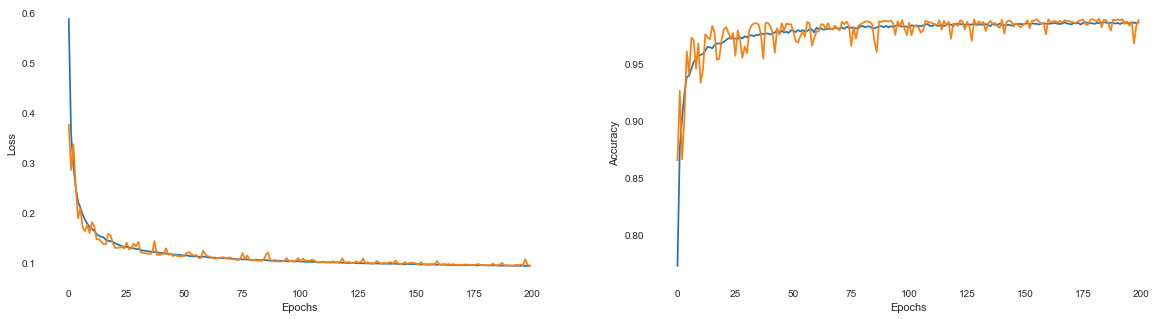

In [158]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [159]:
from sklearn.metrics import accuracy_score
perceptron_train_preds = classifier.predict_classes(x_train)
perceptron_test_preds = classifier.predict_classes(x_test)

print("Train Accuracy :",accuracy_score(y_train,perceptron_train_preds))
print("Test_Accuray   : ",accuracy_score(y_test,perceptron_test_preds))

Train Accuracy : 0.9866235484345142
Test_Accuray   :  0.9879972565157751


In [160]:
print(classification_report(y_train,perceptron_train_preds))
print(classification_report(y_test,perceptron_test_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5169
           1       0.98      0.99      0.98      3664
           2       1.00      0.99      0.99      5859
           3       1.00      0.97      0.98      1446
           4       0.98      0.98      0.98      4271

    accuracy                           0.99     20409
   macro avg       0.99      0.98      0.99     20409
weighted avg       0.99      0.99      0.99     20409

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2134
           1       0.97      0.99      0.98      1620
           2       1.00      0.99      1.00      2541
           3       1.00      0.98      0.99       643
           4       0.99      0.99      0.99      1810

    accuracy                           0.99      8748
   macro avg       0.99      0.99      0.99      8748
weighted avg       0.99      0.99      0.99      8748

